In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\User\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [11]:
data=pd.read_csv(r"E:\ml_ai_ict\Wholesale customers data.csv")

In [12]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [14]:
#checking for null
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

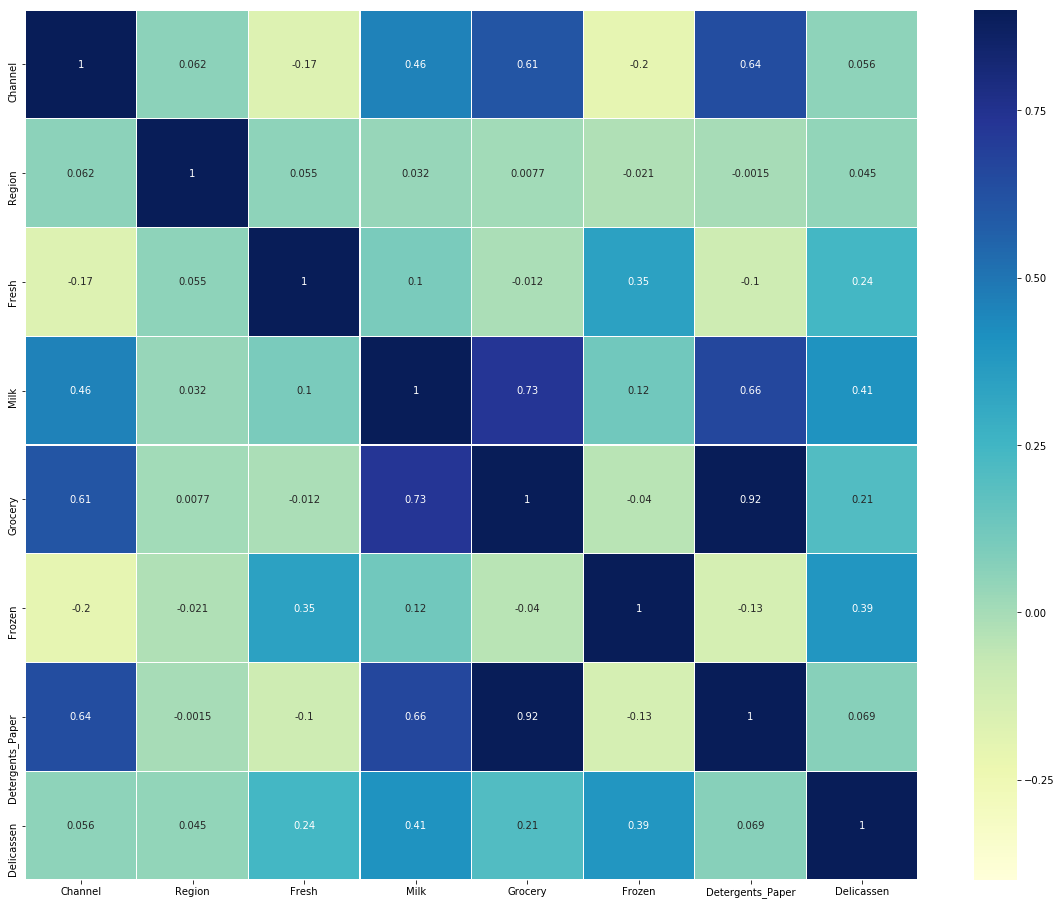

In [15]:
correl=data.corr()
plt.subplots(figsize=(20,16))
sns.heatmap(correl,vmin=-0.4 , vmax=0.9, annot=True, cmap='YlGnBu' , linewidth=0.2)

In [16]:
#grocery and detergents paper are highly correlated.So detergents paper can be dropped
data=data.drop(["Detergents_Paper"],axis=1)
cols=data.columns

In [17]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
data=pd.DataFrame(minmax.fit_transform(data),columns=cols)

In [18]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.108093


# 1.kMeans clustering

180.90389129136048
81.55127096087504
38.166072586881185
23.010396660592082
18.216754321843855
15.666740649182433
13.339096574129863
10.867581999999944
9.195089756155658
8.5064596746609


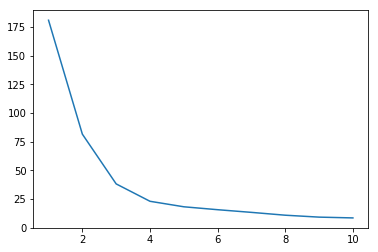

In [19]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',random_state=42)
    km.fit(data)
    wcss.append(km.inertia_)
    print(km.inertia_)
plt.plot(range(1,11),wcss)

From the elbow plot,optimum number of clusters=4

In [20]:
#output of kmeans
km=KMeans(n_clusters=4,init='k-means++',random_state=42)
y_out=km.fit_predict(data)

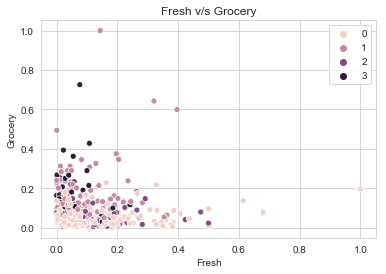

In [24]:
#visualizing clusters 
sns.set_style('whitegrid')
sns.scatterplot(
    data=data,
    x="Fresh",
    y="Grocery",
    hue=y_out
)
plt.xlabel("Fresh")
plt.ylabel("Grocery")
plt.title("Fresh v/s Grocery")
plt.show()

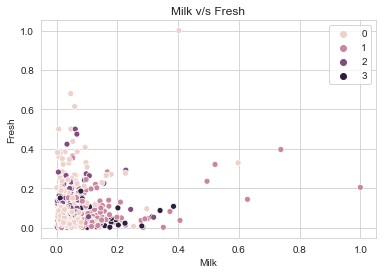

In [32]:
sns.set_style('whitegrid')
sns.scatterplot(
    data=data,
    x="Milk",
    y="Fresh",
    hue=y_out
)
plt.xlabel("Milk")
plt.ylabel("Fresh")
plt.title("Milk v/s Fresh")
plt.show()

# 2.Hierarchial clustering

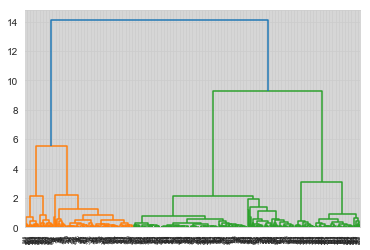

In [27]:
#plotting dendrogram
import scipy.cluster.hierarchy as sch

dendrogram=sch.dendrogram(sch.linkage(data,method='ward'))

number of clusters=2,since the right hand side blue line is longest dendrite

In [28]:
from sklearn.cluster import AgglomerativeClustering
agg=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_predict=agg.fit_predict(data)


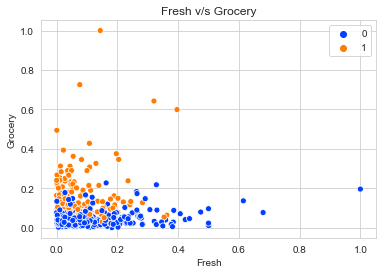

In [29]:
#visualization
sns.set_style('whitegrid')
sns.scatterplot(
    data=data,
    x="Fresh",
    y="Grocery",
    hue=y_predict,
    palette='bright'
)
plt.xlabel("Fresh")
plt.ylabel("Grocery")
plt.title("Fresh v/s Grocery")
plt.show()

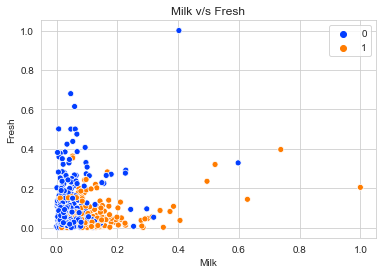

In [30]:
sns.set_style('whitegrid')
sns.scatterplot(
    data=data,
    x="Milk",
    y="Fresh",
    hue=y_predict,
    palette='bright'
)
plt.xlabel("Milk")
plt.ylabel("Fresh")
plt.title("Milk v/s Fresh")
plt.show()

# With PCA reduction

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
pca =PCA(n_components=3) 
X_reduce = pca.fit_transform(data)

a)kMeans

172.23037075708524
72.8827663372156
29.501313364712782
14.357499858473501
9.618245146339156
7.299624931175095
5.218683158432009
3.591030285651056
2.499131333382452
2.0990565602060567


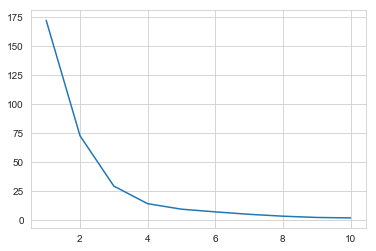

In [34]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',random_state=42)
    km.fit(X_reduce)
    wcss.append(km.inertia_)
    print(km.inertia_)
plt.plot(range(1,11),wcss)

The optimum number of clusters=4

In [43]:
#output of kmeans
km=KMeans(n_clusters=4,init='k-means++',random_state=42)
y_out=list(km.fit_predict(X_reduce))

In [44]:
loc0=y_out.index(0)
loc1=y_out.index(1)
loc2=y_out.index(2)
loc3=y_out.index(3)


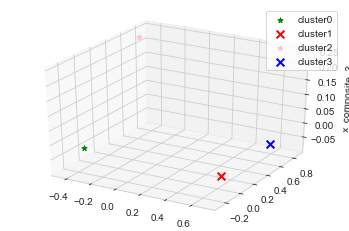

In [47]:
#visualization
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
ax.scatter(X_reduce[loc0, 0], X_reduce[loc0,1],X_reduce[loc0,2], s=30,marker="*",lw=1, label="cluster0",c="green")

ax.scatter(X_reduce[loc1,0],X_reduce[loc1,1], X_reduce[loc1,2],lw=2, s=60, marker="x", c="red", label="cluster1")

ax.scatter(X_reduce[loc2, 0], X_reduce[loc2,1],X_reduce[loc2,2], s=30,marker="*",lw=1, label="cluster2",c="pink")

ax.scatter(X_reduce[loc3,0],X_reduce[loc3,1], X_reduce[loc3,2],lw=2, s=60, marker="x", c="blue", label="cluster3")

ax.legend()
plt.show() 

hierarchical clustering


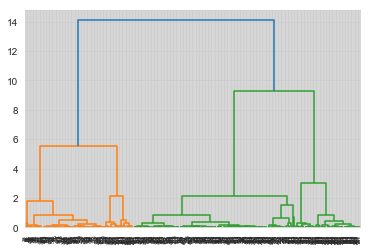

In [49]:
dendrogram=sch.dendrogram(sch.linkage(X_reduce,method='ward'))

number of clusters=2

In [52]:
agg=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_predict=list(agg.fit_predict(X_reduce))

In [54]:
loc0=y_predict.index(0)
loc1=y_predict.index(1)


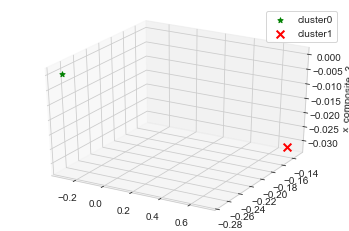

In [55]:
#visualization
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
ax.scatter(X_reduce[loc0, 0], X_reduce[loc0,1],X_reduce[loc0,2], s=30,marker="*",lw=1, label="cluster0",c="green")

ax.scatter(X_reduce[loc1,0],X_reduce[loc1,1], X_reduce[loc1,2],lw=2, s=60, marker="x", c="red", label="cluster1")

ax.legend()
plt.show() 

In [59]:
hierarchial=pd.DataFrame(X_reduce)

In [60]:
hierarchial.loc[:,"output"]=y_predict

In [62]:
hierarchial.to_csv("hierarchial.csv")

In [63]:
kmeans=pd.DataFrame(X_reduce)
kmeans.loc[:,"output"]=y_out

In [64]:
kmeans.to_csv("kmeans.csv")